---
## Homework 08 - Image Rotation and Convolutions 
---


### Problem 1:  

In this problem, you will take an image and rotate it $90^{\circ}$ counterclockwise. 

- To begin, read over the given code cell  and execute it. We are using the Python Image Library (PIL) to do some manipulations.
- You've been given a sample image that is generated with RGB values that assign color to each pixel. You may use this image throughout the assignment or generate your own pixel art. One caveat, if you choose to create your own image, it needs to be asymmetrical so that we can tell whether it's been properly rotated or not simply by looking at it.

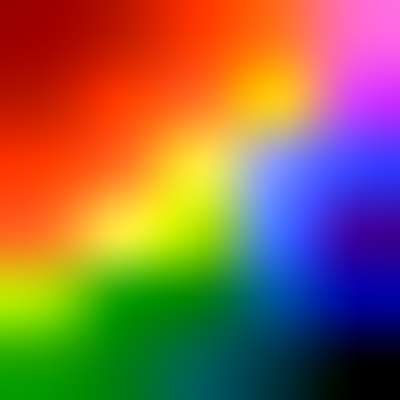

In [5]:
from PIL import Image
import numpy as np

# List of pixels  in a 6 row x 5 column image. Pixels are defined by
# RGB values.
pixels = [
   [(160,0,0), (192,24,0), (255,60,0), (255,116,32),(255,1128,208)],
   [(192,24,0), (255,60,0), (255,116,32), (255,200,32),(208,64,255)],
   [(255,60,0), (255,116,32), (255,232,64), (128,144,255),(64,64,255)],
   [(255,116,32), (255,232,64), (168,224,0), (64,112,255),(60,0,160)],
    [(168,224,0), (20,160,0), (0,128,16), (0,80,160),(0,0,160)],
    [(20,160,0), (0,128,16), (0,96,84), (0,48,64),(0,0,0)]
]

# Convert the pixels into an array using numpy
array = np.array(pixels, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
im = Image.fromarray(array)

# Resize the image to make it possible for us to view the image
im = im.resize((400,400))

# Display image to screen
im

---

Your task is to rotate the image $90^{\circ}$ counterclockwise. In order to do this, we will be imitating the process from example 8.4 (page 159 of the text). Follow the steps below:

- Create a vector $x$ using the pixel intensities given by the `pixel` array above. Order the pixels using **row-major ordering**.
- Create a transformation matrix $A$ such that $y = Ax$ with $y$ being the vector containing the newly mapped pixel intensities.
- Use your transformation matrix to find $y$
- Convert $y$ into a 2D array and display your rotated image to the screen.

In [20]:
# Solution - Part 1: creating the vector x using row major ordering
x=[]
for i in range(6):
    for j in range(5):
        x.append(pixels[i][j])
        j=j+1
    i=i+1
print(x)

[(160, 0, 0), (192, 24, 0), (255, 60, 0), (255, 116, 32), (255, 1128, 208), (192, 24, 0), (255, 60, 0), (255, 116, 32), (255, 200, 32), (208, 64, 255), (255, 60, 0), (255, 116, 32), (255, 232, 64), (128, 144, 255), (64, 64, 255), (255, 116, 32), (255, 232, 64), (168, 224, 0), (64, 112, 255), (60, 0, 160), (168, 224, 0), (20, 160, 0), (0, 128, 16), (0, 80, 160), (0, 0, 160), (20, 160, 0), (0, 128, 16), (0, 96, 84), (0, 48, 64), (0, 0, 0)]


In [22]:
# Solution - Part 2: Generate our transformation matrix A
A=[
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    
[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
]

In [23]:
# Solution - Part 3: Perform the matrix-vector product to get y
y=np.dot(A,x)
print (y)

[[ 255 1128  208]
 [ 208   64  255]
 [  64   64  255]
 [  60    0  160]
 [   0    0  160]
 [   0    0    0]
 [ 255  116   32]
 [ 255  200   32]
 [ 128  144  255]
 [  64  112  255]
 [   0   80  160]
 [   0   48   64]
 [ 255   60    0]
 [ 255  116   32]
 [ 255  232   64]
 [ 168  224    0]
 [   0  128   16]
 [   0   96   84]
 [ 192   24    0]
 [ 255   60    0]
 [ 255  116   32]
 [ 255  232   64]
 [  20  160    0]
 [   0  128   16]
 [ 160    0    0]
 [ 192   24    0]
 [ 255   60    0]
 [ 255  116   32]
 [ 168  224    0]
 [  20  160    0]]


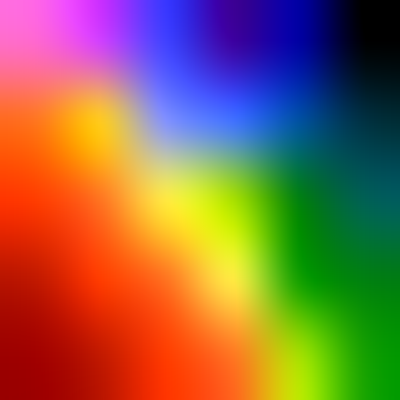

In [43]:
# Solution - Part 4: Map vector y to a 2D array of pixels
finalArr=[]
temp=[]
counter =0
for i in range(5):
    for j in range(6):
        temp.append(y[counter])
        counter=counter+1
    finalArr.append(temp)
    i=i+1
    temp=[]
# Convert the pixels into an array using numpy
array = np.array(finalArr, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
im = Image.fromarray(array)

# Resize the image to make it possible for us to view the image
im = im.resize((400,400))

# Display image to screen
im

---

### Problem 2: 

In this problem, we will compute the convolution matrix from the textbook (page 141).

You are given the matrix $X$ and the point spread function $B$ below. Your task is to compute the convolution matrix $Y = X \star B$.

Note that you may **not** hard code the convolution matrix.

**Hint/Tip**: I found it helpful to write a function that returned $X[i][j] = 0$ for any index out of bounds errors. This was helpful when computing the convolution matrix values along the first row, first column, lastt row, and last column. That allowed me to write the indexing of the convolution without worrying about IndexErrors.

In [130]:
# Given matrices

X = np.array([[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,0,0,0,0,0,1,1],
             [1,1,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,1,1],[1,1,1,0,1,1,0,1,1],
             [1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1]])

B = np.array([[0.25,0.25],[0.25,0.25]])

In [138]:
# Solution
C=np.pad(X, 1)
Y=[]
temp=[]
print(C)
for i in range(1,10):
    for j in range(1,11):
        temp.append((C[i,j]+C[i-1,j]+C[i-1,j-1]+C[i,j-1])/float(4))
        j=j+1
    i=i+1
    Y.append(temp)
    temp=[]
print(Y)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 1 1 0]
 [0 1 1 1 0 1 1 0 1 1 0]
 [0 1 1 1 0 1 1 0 1 1 0]
 [0 1 1 1 0 1 1 0 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25], [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5], [0.5, 1.0, 0.75, 0.5, 0.5, 0.5, 0.5, 0.75, 1.0, 0.5], [0.5, 1.0, 0.75, 0.25, 0.25, 0.5, 0.25, 0.5, 1.0, 0.5], [0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5], [0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5], [0.5, 1.0, 1.0, 0.75, 0.75, 1.0, 0.75, 0.75, 1.0, 0.5], [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5], [0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25]]


In [139]:
# Print your convolution matrix to the screen.
Z=np.array(Y)
print(Z)

[[0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.25]
 [0.5  1.   1.   1.   1.   1.   1.   1.   1.   0.5 ]
 [0.5  1.   0.75 0.5  0.5  0.5  0.5  0.75 1.   0.5 ]
 [0.5  1.   0.75 0.25 0.25 0.5  0.25 0.5  1.   0.5 ]
 [0.5  1.   1.   0.5  0.5  1.   0.5  0.5  1.   0.5 ]
 [0.5  1.   1.   0.5  0.5  1.   0.5  0.5  1.   0.5 ]
 [0.5  1.   1.   0.75 0.75 1.   0.75 0.75 1.   0.5 ]
 [0.5  1.   1.   1.   1.   1.   1.   1.   1.   0.5 ]
 [0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.25]]
